In [1]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv = "../datos/Datos analisis/datos_oportunidad_cuenta_target.csv"

# Intentar leer con separador ';' (muy común en CSV exportados desde Excel)
datos = pd.read_csv(ruta_csv, sep=';', engine='python', on_bad_lines='skip')

# Mostrar las primeras filas
print(datos)

       Unnamed: 0                  ID           ACCOUNTID PL_CURSO_ACADEMICO  \
0               0  0061r00001KLSSJAA5  0011r00002YMDC6AAP          2022/2023   
1               1  0066900001W1pVKAAZ  0016900002mntULAAY          2022/2023   
2               2  0066900001cHyR5AAK  0016900002vnx7kAAA          2022/2023   
3               3  0066900001MevZwAAJ  0016900002aNZZuAAO          2022/2023   
4               4  0066900001VzuaIAAR  0016900002jiFCfAAM          2022/2023   
...           ...                 ...                 ...                ...   
53070       53070  006Vl00000yBsguIAC  001Tr00000Ono13IAB          2026/2027   
53071       53071  006Vl000010Nz8jIAC  001Vl00001FJK20IAH          2026/2027   
53072       53072  006Vl00000yh4yhIAA  001Vl00001ClP6uIAF          2026/2027   
53073       53073  006Vl00000yhmzhIAA  001Vl00001DT74XIAT          2026/2027   
53074       53074  006Vl00000yhn4XIAQ  001Vl00001DS9IAIA1          2026/2027   

         PL_TIPO_ACCESO        RECORDTY

# Embudo por Procedencia

### Distribución entre Nacional e Internacional.

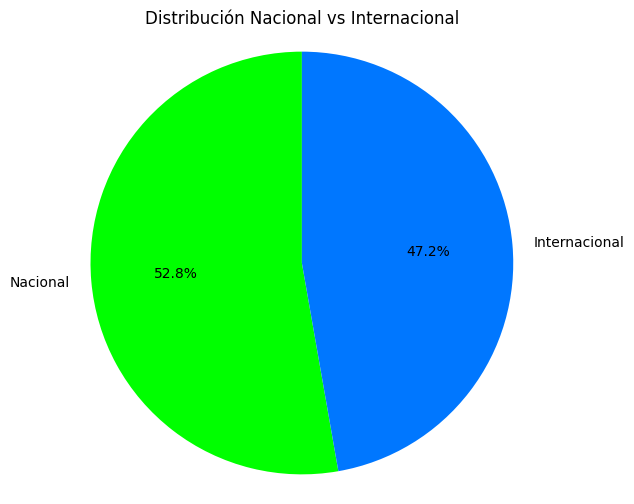

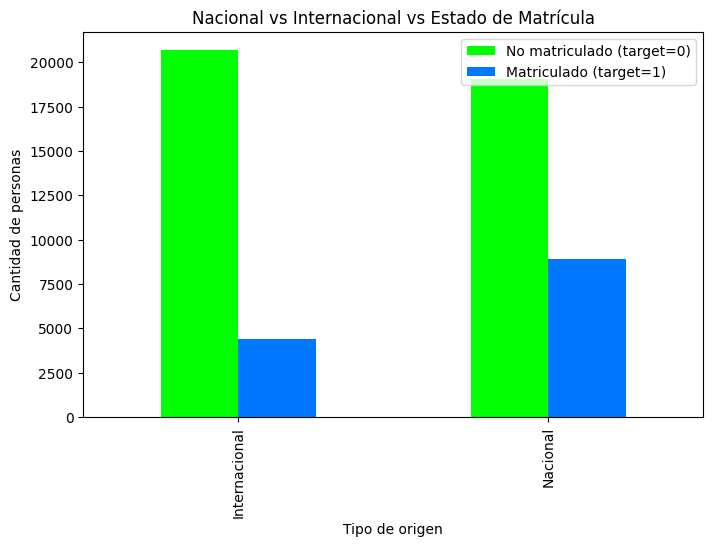

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Crear columna combinada
df['Tipo_origen'] = df.apply(lambda row: 'Nacional' if row['CH_NACIONAL__PC'] == True else 'Internacional', axis=1)

# Pie chart general
origen_pct = df['Tipo_origen'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(origen_pct, labels=origen_pct.index, autopct='%1.1f%%', startangle=90, colors=["#00FF00", "#0077FF"])
plt.title('Distribución Nacional vs Internacional')
plt.axis('equal')
plt.show()

# Barras por target
conteo_origen_target = df.groupby(['Tipo_origen', 'target']).size().unstack(fill_value=0)
conteo_origen_target.plot(kind='bar', stacked=False, figsize=(8,5), color=['#00FF00', '#0077FF'])
plt.title('Nacional vs Internacional vs Estado de Matrícula')
plt.xlabel('Tipo de origen')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()


### Distribución nacional entre provincias

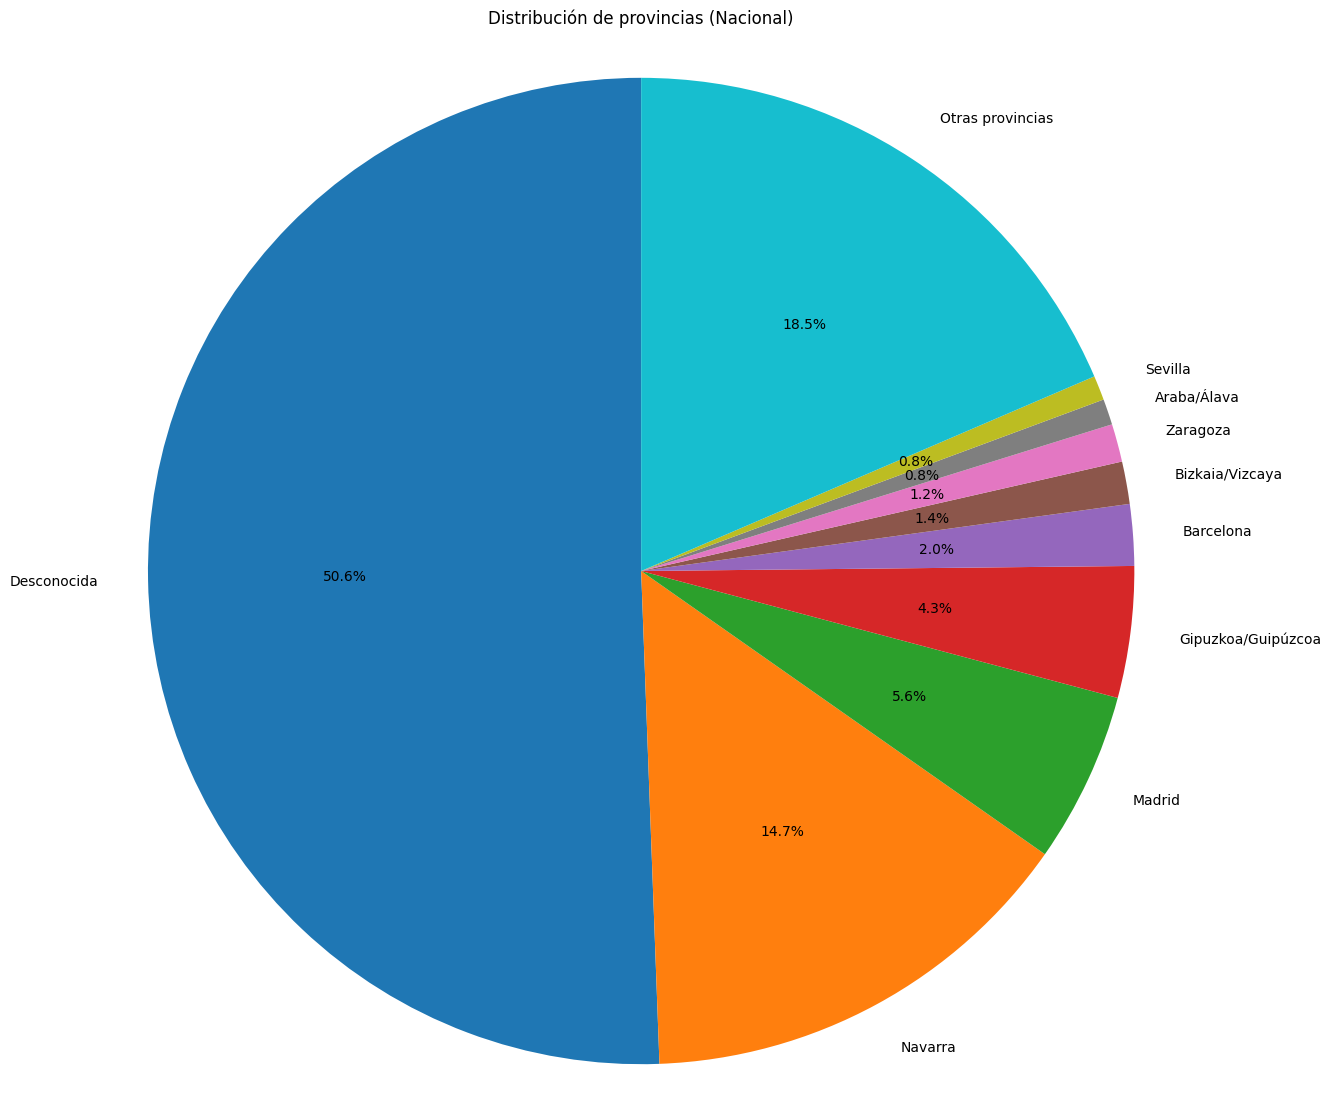

C:\Users\0021878\AppData\Local\Temp\ipykernel_19956\1220330915.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nacional['Provincia_agrupada'] = df_nacional['FOR_PROVINCIA_DE_NACIMIENTO__P'].fillna('Desconocida').apply(


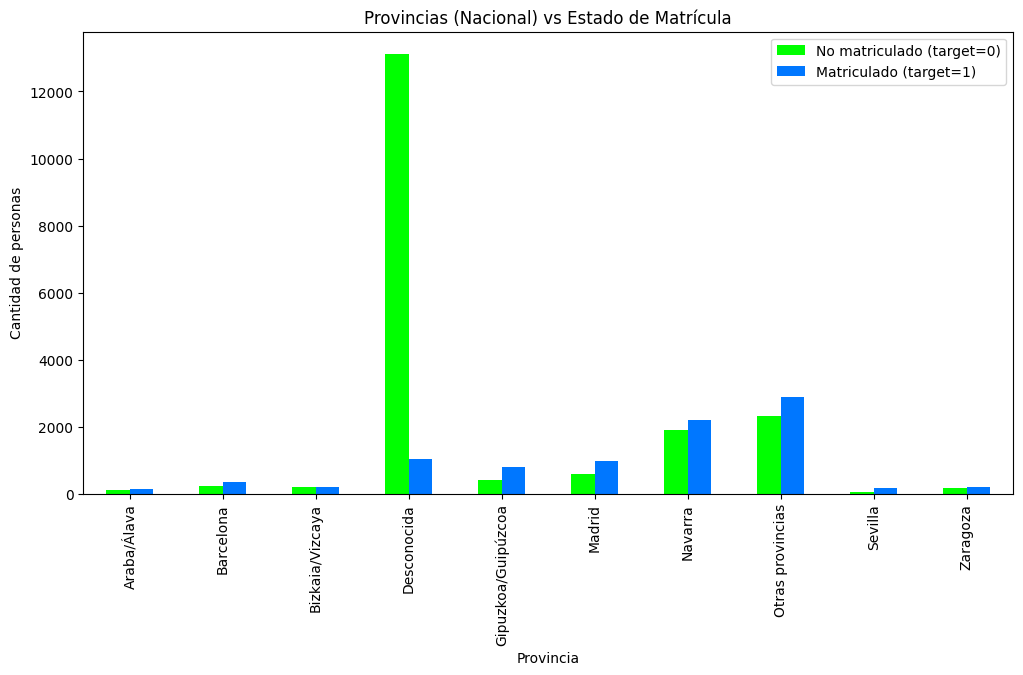

In [58]:
# Filtrar solo nacionales
df_nacional = df[df['Tipo_origen'] == 'Nacional']

# Calcular porcentajes de provincias (incluyendo NaN como 'Desconocida')
provincia_pct = df_nacional['FOR_PROVINCIA_DE_NACIMIENTO__P'].fillna('Desconocida').value_counts(normalize=True) * 100

# Filtrar >= 0.8% y agrupar el resto
provincia_filtrada = provincia_pct[provincia_pct >= 0.8]
otras_pct = provincia_pct[provincia_pct < 0.8].sum()
provincia_filtrada['Otras provincias'] = otras_pct

# Pie chart con agrupación
plt.figure(figsize=(14,14))
plt.pie(provincia_filtrada, labels=provincia_filtrada.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de provincias (Nacional)')
plt.axis('equal')
plt.show()

# Barras por target con agrupación
df_nacional['Provincia_agrupada'] = df_nacional['FOR_PROVINCIA_DE_NACIMIENTO__P'].fillna('Desconocida').apply(
    lambda x: x if provincia_pct[x] >= 0.8 else 'Otras provincias'
)

conteo_provincia_target = df_nacional.groupby(['Provincia_agrupada', 'target']).size().unstack(fill_value=0)
conteo_provincia_target.plot(kind='bar', stacked=False, figsize=(12,6), color=['#00FF00', '#0077FF'])
plt.title('Provincias (Nacional) vs Estado de Matrícula')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()


### Distribución internacional entre paises

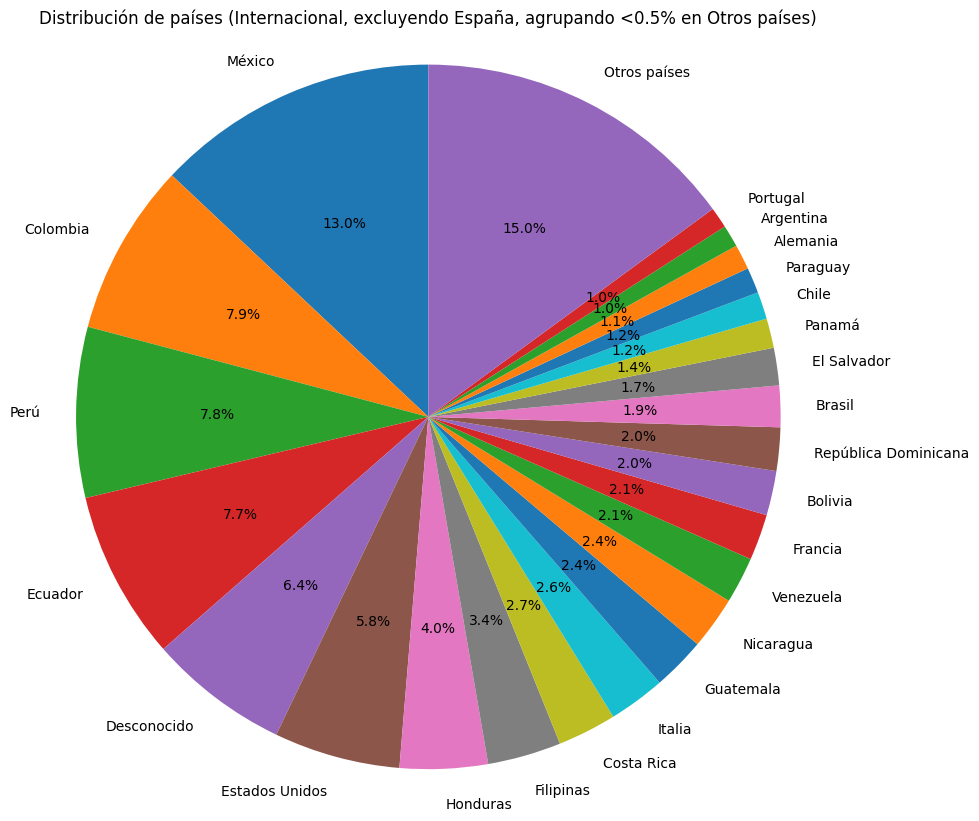

C:\Users\0021878\AppData\Local\Temp\ipykernel_19956\2255389656.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internacional['Pais_agrupado'] = df_internacional['NAMEX_cuenta'].fillna('Desconocido').apply(


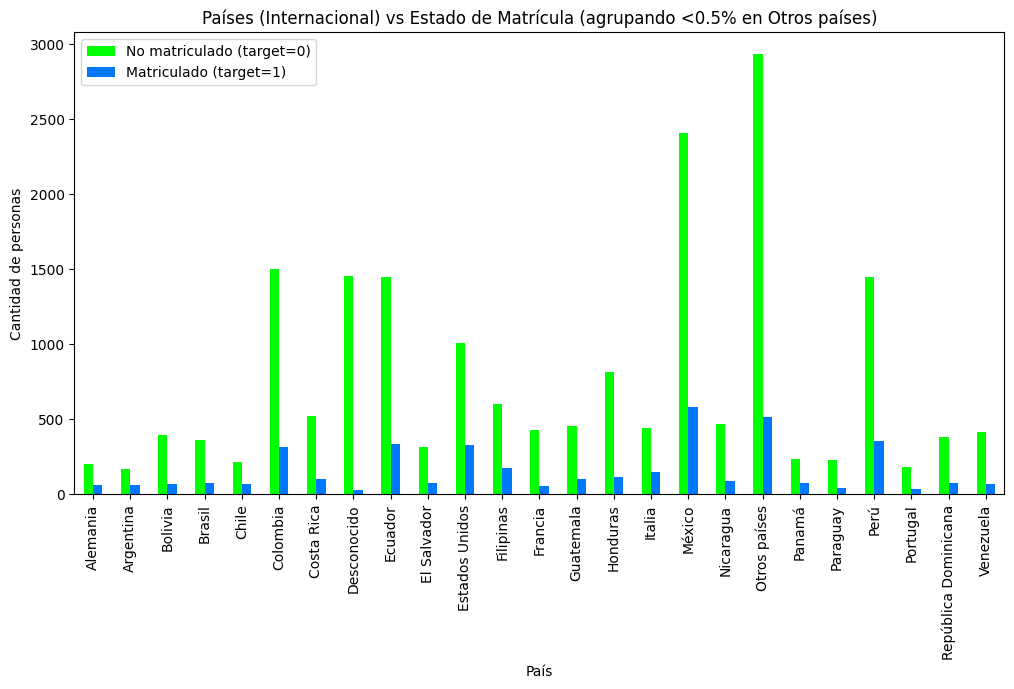

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Crear columna Tipo_origen
df['Tipo_origen'] = df.apply(
    lambda row: 'Nacional' if row['CH_NACIONAL__PC'] == True else 'Internacional',
    axis=1
)


# Filtrar solo internacionales y excluir España
df_internacional = df[(df['Tipo_origen'] == 'Internacional') & (df['NAMEX_cuenta'] != 'España')]

# Calcular porcentajes de países (incluyendo NaN como 'Desconocido')
pais_pct = df_internacional['NAMEX_cuenta'].fillna('Desconocido').value_counts(normalize=True) * 100

# Filtrar >= 0.8% y agrupar el resto
pais_filtrado = pais_pct[pais_pct >= 0.9]
otros_pct = pais_pct[pais_pct < 0.8].sum()
pais_filtrado['Otros países'] = otros_pct

# Pie chart con agrupación
plt.figure(figsize=(10,10))
plt.pie(pais_filtrado, labels=pais_filtrado.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de países (Internacional, excluyendo España, agrupando <0.5% en Otros países)')
plt.axis('equal')
plt.show()

# Barras por target con agrupación
df_internacional['Pais_agrupado'] = df_internacional['NAMEX_cuenta'].fillna('Desconocido').apply(
    lambda x: x if pais_pct[x] >= 0.8 else 'Otros países'
)

conteo_pais_target = df_internacional.groupby(['Pais_agrupado', 'target']).size().unstack(fill_value=0)
conteo_pais_target.plot(kind='bar', stacked=False, figsize=(12,6), color=['#00FF00', '#0077FF'])
plt.title('Países (Internacional) vs Estado de Matrícula (agrupando <0.5% en Otros países)')
plt.xlabel('País')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()


# Perfil Académico

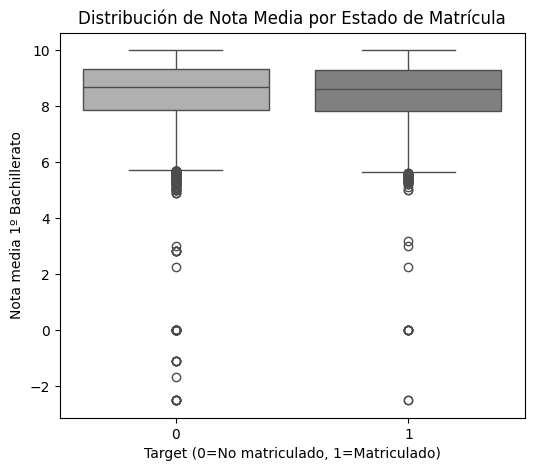

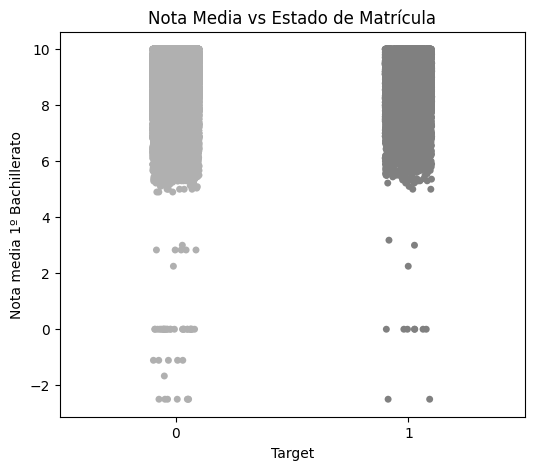

          count      mean       std  min   25%   50%   75%   max
target                                                          
0       28405.0  8.506097  1.069091 -2.5  7.88  8.68  9.33  10.0
1       10497.0  8.491374  1.042765 -2.5  7.83  8.63  9.30  10.0


ModuleNotFoundError: No module named 'scipy'

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Nombre exacto de la columna de nota
columna_nota = "NU_NOTA_MEDIA_1_BACH__PC"

# Filtrar registros con nota válida
df_filtrado = df[df[columna_nota].notna()].copy()

# Asegurar que target es numérico
df_filtrado['target'] = pd.to_numeric(df_filtrado['target'], errors='coerce')

# 1. Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x='target', y=columna_nota, data=df_filtrado, hue='target', palette=['#B0B0B0', '#808080'], legend=False)
plt.title('Distribución de Nota Media por Estado de Matrícula')
plt.xlabel('Target (0=No matriculado, 1=Matriculado)')
plt.ylabel('Nota media 1º Bachillerato')
plt.show()

# 2. Scatter plot
plt.figure(figsize=(6,5))
sns.stripplot(x='target', y=columna_nota, data=df_filtrado, hue='target', palette=['#B0B0B0', '#808080'], legend=False, jitter=True)
plt.title('Nota Media vs Estado de Matrícula')
plt.xlabel('Target')
plt.ylabel('Nota media 1º Bachillerato')
plt.show()

# 3. Estadísticas descriptivas
print(df_filtrado.groupby('target')[columna_nota].describe())

# 4. Correlación
correlacion_pearson = df_filtrado[columna_nota].corr(df_filtrado['target'], method='pearson')
correlacion_spearman = df_filtrado[columna_nota].corr(df_filtrado['target'], method='spearman')

print(f"Correlación Pearson: {correlacion_pearson:.3f}")
print(f"Correlación Spearman: {correlacion_spearman:.3f}")


##### Nueva versión

#### Con NU_NOTA_MEDIA_1_BACH__PC

In [74]:
# Hay que instalar SciPy para poder calcular Spearman y así tener el análisis completo:
!pip install scipy


   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------- ----------------------------- 9.7/36.3 MB 46.9 MB/s eta 0:00:01
   --------------- ------------------------ 13.9/36.3 MB 32.1 MB/s eta 0:00:01
   ----------------------- ---------------- 21.5/36.3 MB 33.9 MB/s eta 0:00:01
   ---------------------------------- ----- 31.7/36.3 MB 38.0 MB/s eta 0:00:01
   ---------------------------------------  36.2/36.3 MB 39.5 MB/s eta 0:00:01
   ---------------------------------------- 36.3/36.3 MB 30.1 MB/s  0:00:01



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


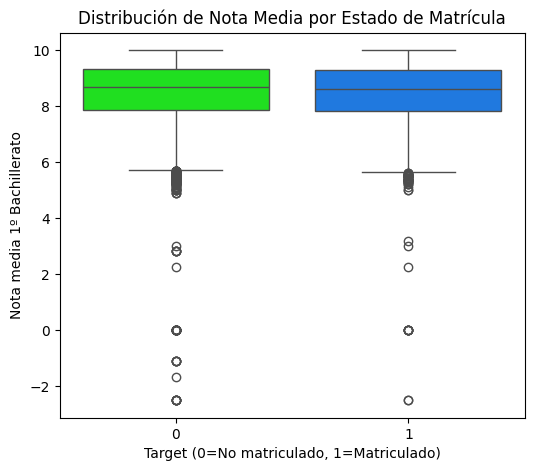

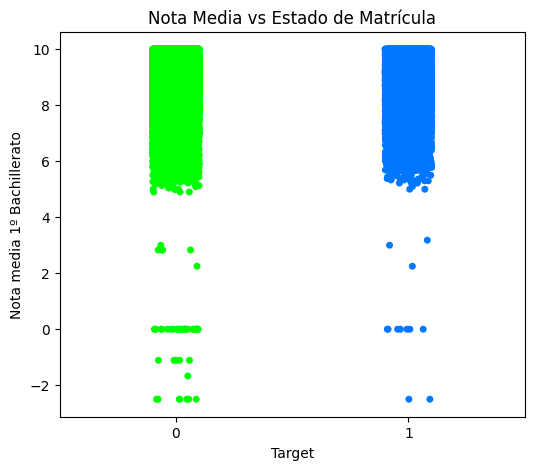

          count      mean       std  min   25%   50%   75%   max
target                                                          
0       28405.0  8.506097  1.069091 -2.5  7.88  8.68  9.33  10.0
1       10497.0  8.491374  1.042765 -2.5  7.83  8.63  9.30  10.0
Correlación Pearson: -0.006
Correlación Spearman: -0.011


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# 2. Nombre exacto de la columna de nota
columna_nota = "NU_NOTA_MEDIA_1_BACH__PC"  # Ajusta si el nombre es distinto

# 3. Filtrar registros con nota válida y target válido
df_filtrado = df[df[columna_nota].notna()].copy()
df_filtrado['target'] = pd.to_numeric(df_filtrado['target'], errors='coerce')
df_filtrado = df_filtrado.dropna(subset=['target'])

# 4. Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x='target', y=columna_nota, data=df_filtrado, hue='target', palette=['#00FF00', '#0077FF'], legend=False)
plt.title('Distribución de Nota Media por Estado de Matrícula')
plt.xlabel('Target (0=No matriculado, 1=Matriculado)')
plt.ylabel('Nota media 1º Bachillerato')
plt.show()

# 5. Scatter plot
plt.figure(figsize=(6,5))
sns.stripplot(x='target', y=columna_nota, data=df_filtrado, hue='target', palette=['#00FF00', '#0077FF'], legend=False, jitter=True)
plt.title('Nota Media vs Estado de Matrícula')
plt.xlabel('Target')
plt.ylabel('Nota media 1º Bachillerato')
plt.show()

# 6. Estadísticas descriptivas
print(df_filtrado.groupby('target')[columna_nota].describe())

# 7. Correlación
correlacion_pearson = df_filtrado[columna_nota].corr(df_filtrado['target'], method='pearson')
correlacion_spearman = df_filtrado[columna_nota].corr(df_filtrado['target'], method='spearman')

print(f"Correlación Pearson: {correlacion_pearson:.3f}")
print(f"Correlación Spearman: {correlacion_spearman:.3f}")


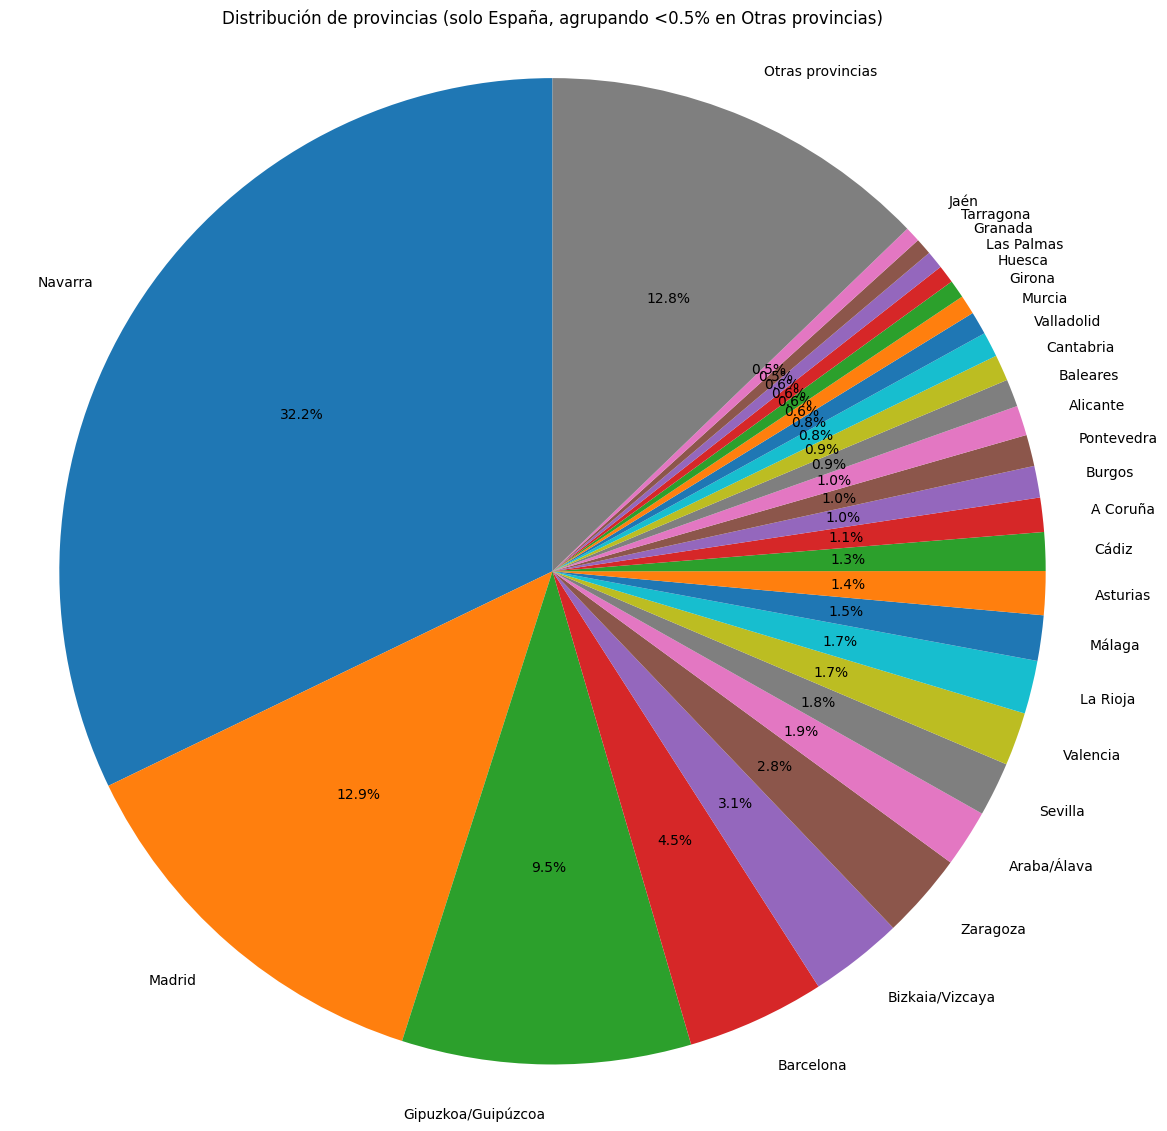

C:\Users\0021878\AppData\Local\Temp\ipykernel_19956\1807284347.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_provincias_esp['Provincia_agrupada'] = df_provincias_esp['FOR_PROVINCIA_DE_NACIMIENTO__P'].apply(


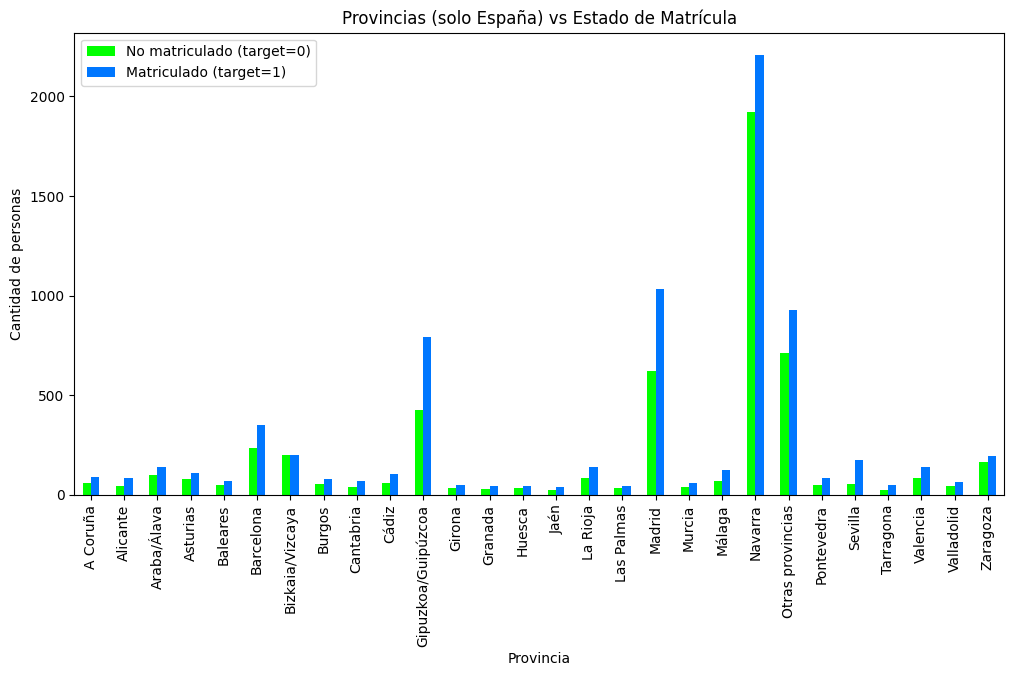

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Filtrar solo registros donde el país sea España
df_provincias_esp = df[(df['NAMEX_cuenta'] == 'España') & (df['FOR_PROVINCIA_DE_NACIMIENTO__P'].notna())]

# Calcular porcentajes de provincias
provincia_pct = df_provincias_esp['FOR_PROVINCIA_DE_NACIMIENTO__P'].value_counts(normalize=True) * 100

# Agrupar provincias con <0.5% en "Otras provincias"
provincia_filtrada = provincia_pct[provincia_pct >= 0.5]
otras_pct = provincia_pct[provincia_pct < 0.5].sum()
provincia_filtrada['Otras provincias'] = otras_pct

# Pie chart
plt.figure(figsize=(14,14))
plt.pie(provincia_filtrada, labels=provincia_filtrada.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de provincias (solo España, agrupando <0.5% en Otras provincias)')
plt.axis('equal')
plt.show()

# Barras por target
df_provincias_esp['Provincia_agrupada'] = df_provincias_esp['FOR_PROVINCIA_DE_NACIMIENTO__P'].apply(
    lambda x: x if provincia_pct[x] >= 0.5 else 'Otras provincias'
)

conteo_provincia_target = df_provincias_esp.groupby(['Provincia_agrupada', 'target']).size().unstack(fill_value=0)
conteo_provincia_target.plot(kind='bar', stacked=False, figsize=(12,6), color=['#00FF00', '#0077FF'])
plt.title('Provincias (solo España) vs Estado de Matrícula')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()


### Con FOR_PAIS_DE_NACIMIENTO__PC

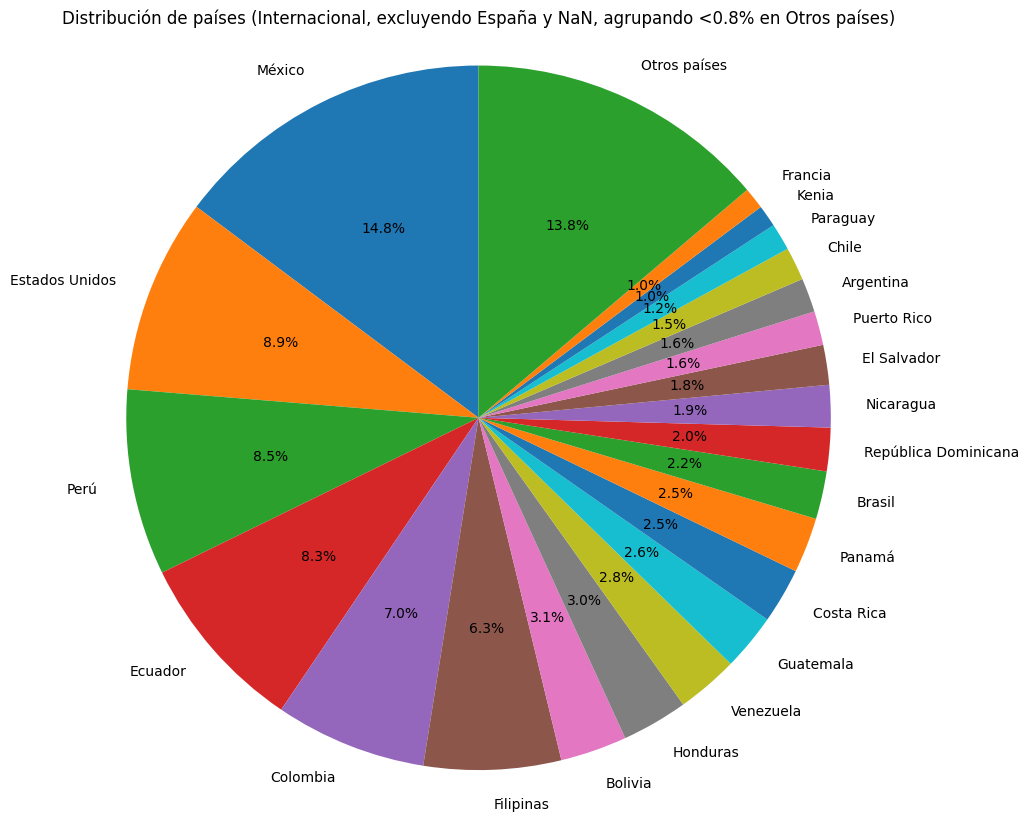

C:\Users\0021878\AppData\Local\Temp\ipykernel_19956\2251279023.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internacional['Pais_agrupado'] = df_internacional['FOR_PAIS_DE_NACIMIENTO__PC'].apply(


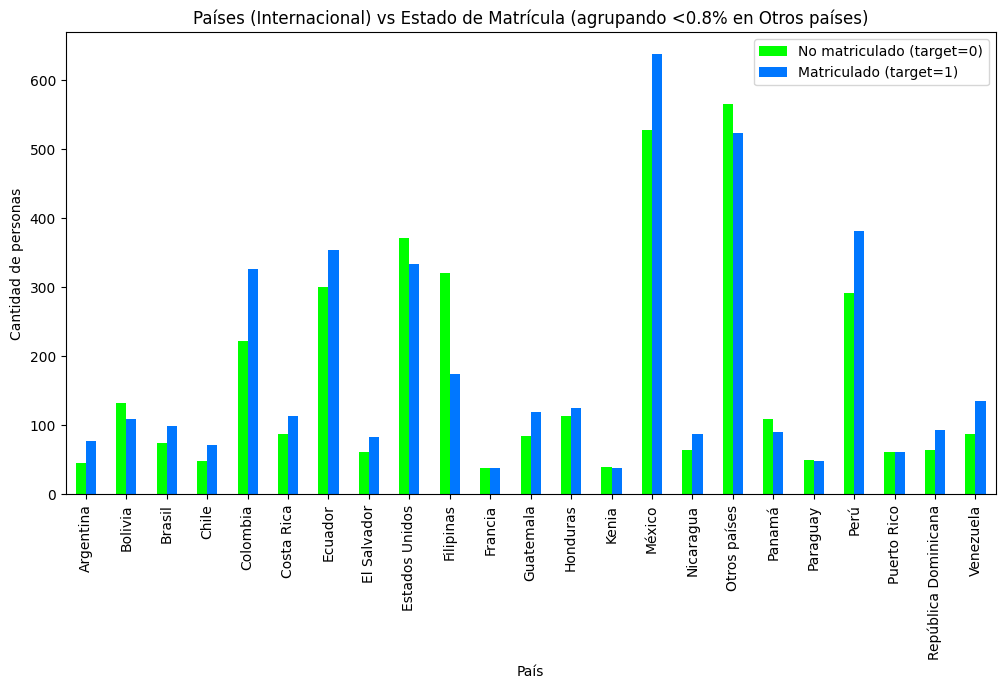

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Crear columna Tipo_origen
df['Tipo_origen'] = df.apply(
    lambda row: 'Nacional' if row['CH_NACIONAL__PC'] == True else 'Internacional',
    axis=1
)

# Filtrar solo internacionales, excluir España y quitar NaN en país
df_internacional = df[
    (df['Tipo_origen'] == 'Internacional') &
    (df['FOR_PAIS_DE_NACIMIENTO__PC'] != 'España') &
    (df['FOR_PAIS_DE_NACIMIENTO__PC'].notna())
]

# Calcular porcentajes de países
pais_pct = df_internacional['FOR_PAIS_DE_NACIMIENTO__PC'].value_counts(normalize=True) * 100

# Filtrar >= 0.8% y agrupar el resto
pais_filtrado = pais_pct[pais_pct >= 0.8]
otros_pct = pais_pct[pais_pct < 0.8].sum()
pais_filtrado['Otros países'] = otros_pct

# Pie chart sin NaN
plt.figure(figsize=(10,10))
plt.pie(pais_filtrado, labels=pais_filtrado.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de países (Internacional, excluyendo España y NaN, agrupando <0.8% en Otros países)')
plt.axis('equal')
plt.show()

# Barras por target sin NaN
pais_pct_dict = pais_pct.to_dict()
df_internacional['Pais_agrupado'] = df_internacional['FOR_PAIS_DE_NACIMIENTO__PC'].apply(
    lambda x: x if pais_pct_dict.get(x, 0) >= 0.8 else 'Otros países'
)

conteo_pais_target = df_internacional.groupby(['Pais_agrupado', 'target']).size().unstack(fill_value=0)
conteo_pais_target.plot(kind='bar', stacked=False, figsize=(12,6), color=['#00FF00', '#0077FF'])
plt.title('Países (Internacional) vs Estado de Matrícula (agrupando <0.8% en Otros países)')
plt.xlabel('País')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()


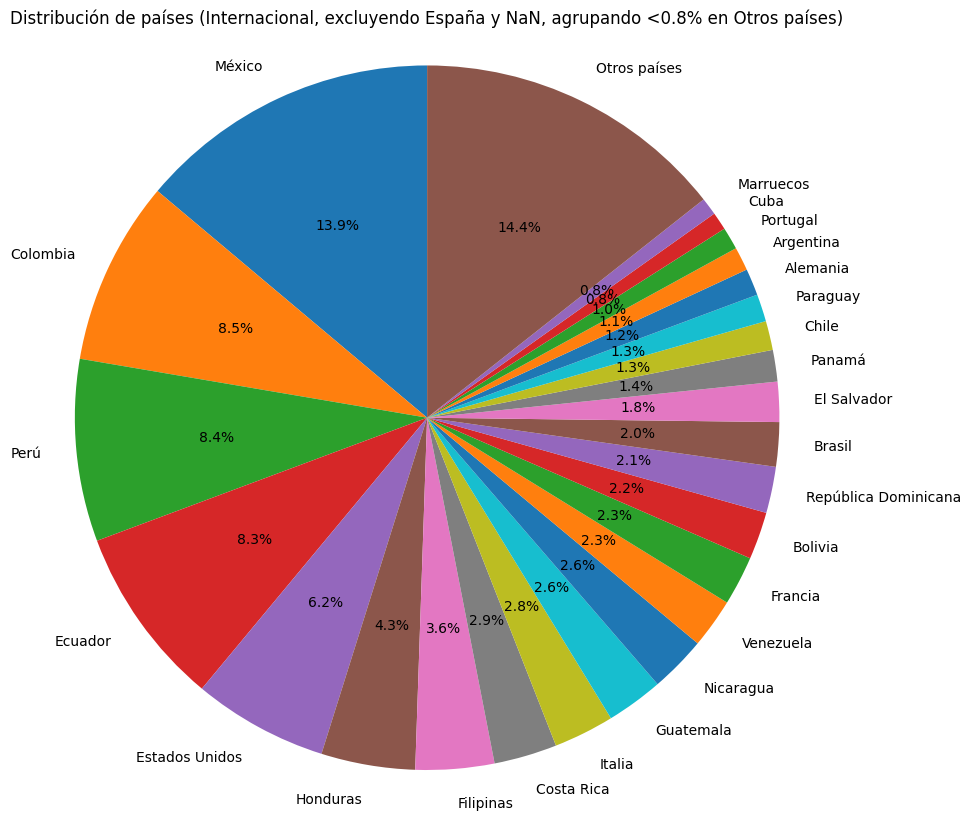

C:\Users\0021878\AppData\Local\Temp\ipykernel_19956\2126055720.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internacional['Pais_agrupado'] = df_internacional['NAMEX_cuenta'].apply(


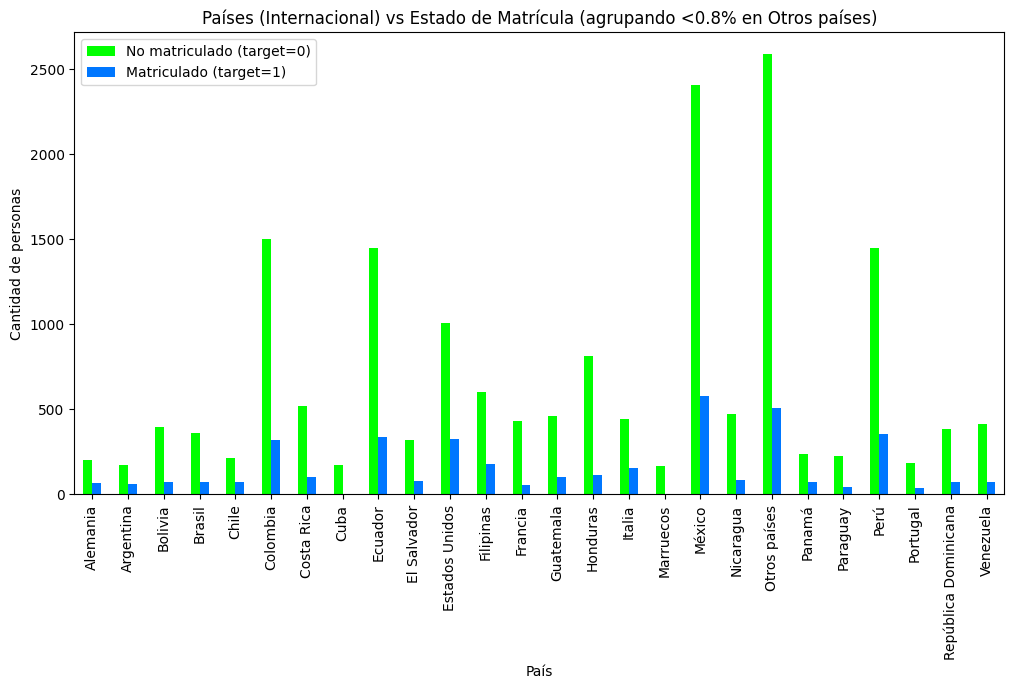

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Crear columna Tipo_origen
df['Tipo_origen'] = df.apply(
    lambda row: 'Nacional' if row['CH_NACIONAL__PC'] == True else 'Internacional',
    axis=1
)

# Filtrar solo internacionales, excluir España y quitar NaN en país
df_internacional = df[
    (df['Tipo_origen'] == 'Internacional') &
    (df['NAMEX_cuenta'] != 'España') &
    (df['NAMEX_cuenta'].notna())
]

# Calcular porcentajes de países
pais_pct = df_internacional['NAMEX_cuenta'].value_counts(normalize=True) * 100

# Filtrar >= 0.8% y agrupar el resto
pais_filtrado = pais_pct[pais_pct >= 0.8]
otros_pct = pais_pct[pais_pct < 0.8].sum()
pais_filtrado['Otros países'] = otros_pct

# Pie chart sin NaN
plt.figure(figsize=(10,10))
plt.pie(pais_filtrado, labels=pais_filtrado.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de países (Internacional, excluyendo España y NaN, agrupando <0.8% en Otros países)')
plt.axis('equal')
plt.show()

# Barras por target sin NaN
pais_pct_dict = pais_pct.to_dict()
df_internacional['Pais_agrupado'] = df_internacional['NAMEX_cuenta'].apply(
    lambda x: x if pais_pct_dict.get(x, 0) >= 0.8 else 'Otros países'
)

conteo_pais_target = df_internacional.groupby(['Pais_agrupado', 'target']).size().unstack(fill_value=0)
conteo_pais_target.plot(kind='bar', stacked=False, figsize=(12,6), color=['#00FF00', '#0077FF'])
plt.title('Países (Internacional) vs Estado de Matrícula (agrupando <0.8% en Otros países)')
plt.xlabel('País')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()


# Impacto Actividades

# Análisis Económico

#### Con CH_MATRICULA_SUJETA_BECA

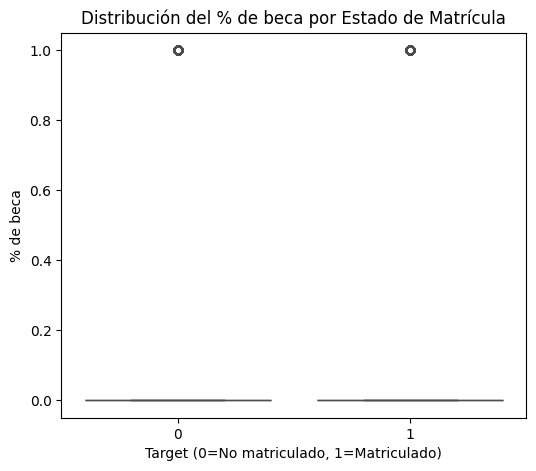

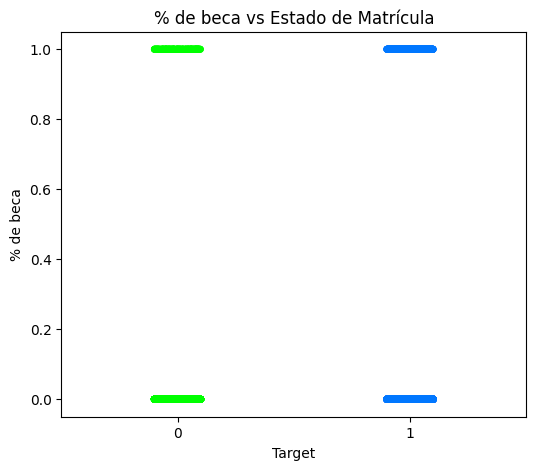

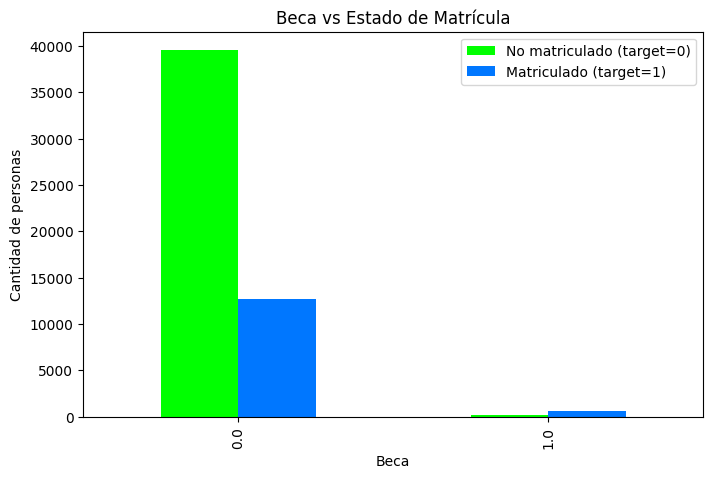

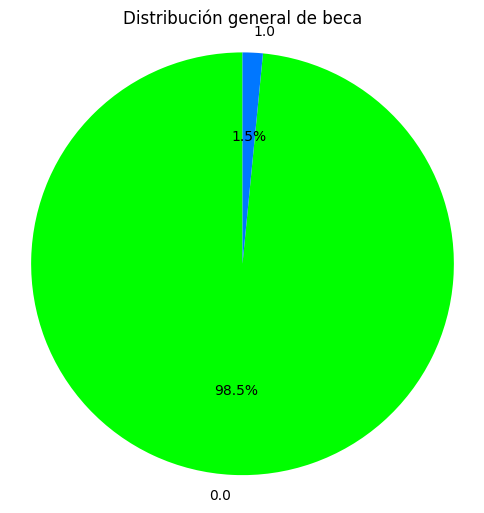

          count      mean       std  min  25%  50%  75%  max
target                                                      
0       39767.0  0.005331  0.072820  0.0  0.0  0.0  0.0  1.0
1       13304.0  0.045701  0.208843  0.0  0.0  0.0  0.0  1.0
Correlación Pearson: 0.142
Correlación Spearman: 0.142


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# 2. Nombre exacto de la columna de beca
columna_beca = "CH_MATRICULA_SUJETA_BECA"  # Ajusta si el nombre es distinto

# 3. Filtrar registros con beca válida y target válido
df_filtrado = df[df[columna_beca].notna()].copy()
df_filtrado['target'] = pd.to_numeric(df_filtrado['target'], errors='coerce')
df_filtrado = df_filtrado.dropna(subset=['target'])

# 4. Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x='target', y=columna_beca, data=df_filtrado, hue='target', palette=['#00FF00', '#0077FF'], legend=False)
plt.title('Distribución del % de beca por Estado de Matrícula')
plt.xlabel('Target (0=No matriculado, 1=Matriculado)')
plt.ylabel('% de beca')
plt.show()

# 5. Scatter plot
plt.figure(figsize=(6,5))
sns.stripplot(x='target', y=columna_beca, data=df_filtrado, hue='target', palette=['#00FF00', '#0077FF'], legend=False, jitter=True)
plt.title('% de beca vs Estado de Matrícula')
plt.xlabel('Target')
plt.ylabel('% de beca')
plt.show()

# 6. Gráfico de barras (conteo por target y beca)
conteo_beca_target = df_filtrado.groupby([columna_beca, 'target']).size().unstack(fill_value=0)
conteo_beca_target.plot(kind='bar', stacked=False, figsize=(8,5), color=['#00FF00', '#0077FF'])
plt.title('Beca vs Estado de Matrícula')
plt.xlabel('Beca')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()

# 7. Pie chart (distribución general de beca)
beca_pct = df_filtrado[columna_beca].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(beca_pct, labels=beca_pct.index, autopct='%1.1f%%', startangle=90, colors=['#00FF00', '#0077FF'])
plt.title('Distribución general de beca')
plt.axis('equal')
plt.show()

# 8. Estadísticas descriptivas
print(df_filtrado.groupby('target')[columna_beca].describe())

# 9. Correlaciones
correlacion_pearson = df_filtrado[columna_beca].corr(df_filtrado['target'], method='pearson')
correlacion_spearman = df_filtrado[columna_beca].corr(df_filtrado['target'], method='spearman')

print(f"Correlación Pearson: {correlacion_pearson:.3f}")
print(f"Correlación Spearman: {correlacion_spearman:.3f}")


#### Con CH_BECASAYUDAS__PC

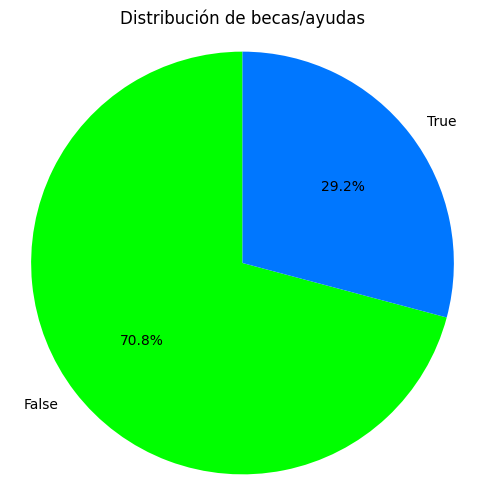

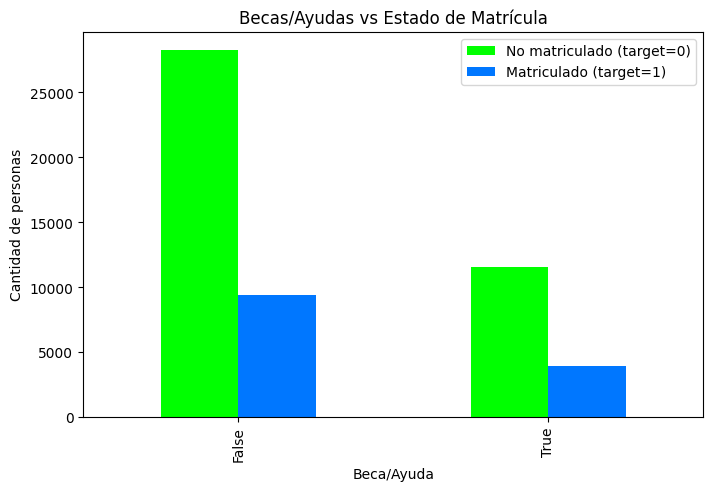

Tasa de conversión (% matriculados) por grupo:
CH_BECASAYUDAS__PC
False    24.870342
True     25.552683
dtype: float64


In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("datos_oportunidad_cuenta_target.csv", sep=';', engine='python')

# Columna de becas/ayudas
columna_beca_ayuda = "CH_BECASAYUDAS__PC"

# Filtrar registros con valor válido y target válido
df_filtrado = df[df[columna_beca_ayuda].notna()].copy()
df_filtrado['target'] = pd.to_numeric(df_filtrado['target'], errors='coerce')
df_filtrado = df_filtrado.dropna(subset=['target'])

# 1. Pie chart
beca_ayuda_pct = df_filtrado[columna_beca_ayuda].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(beca_ayuda_pct, labels=beca_ayuda_pct.index, autopct='%1.1f%%', startangle=90, colors=['#00FF00', '#0077FF'])
plt.title('Distribución de becas/ayudas')
plt.axis('equal')
plt.show()

# 2. Gráfico de barras por target
conteo_beca_ayuda_target = df_filtrado.groupby([columna_beca_ayuda, 'target']).size().unstack(fill_value=0)
conteo_beca_ayuda_target.plot(kind='bar', stacked=False, figsize=(8,5), color=['#00FF00', '#0077FF'])
plt.title('Becas/Ayudas vs Estado de Matrícula')
plt.xlabel('Beca/Ayuda')
plt.ylabel('Cantidad de personas')
plt.legend(['No matriculado (target=0)', 'Matriculado (target=1)'])
plt.show()

# 3. Tasa de conversión
tasa_conversion = conteo_beca_ayuda_target.apply(lambda x: (x[1] / x.sum()) * 100, axis=1)
print("Tasa de conversión (% matriculados) por grupo:")
print(tasa_conversion)
